In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


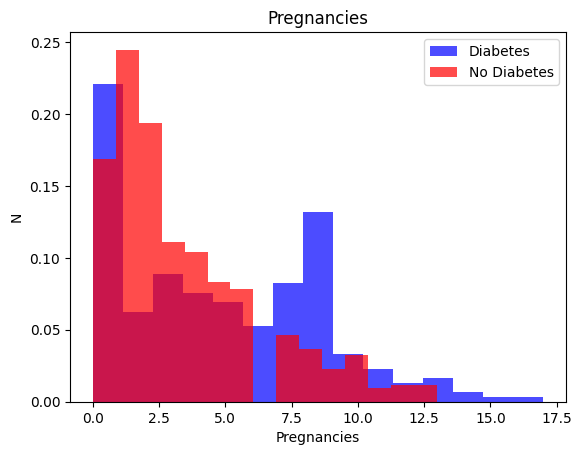

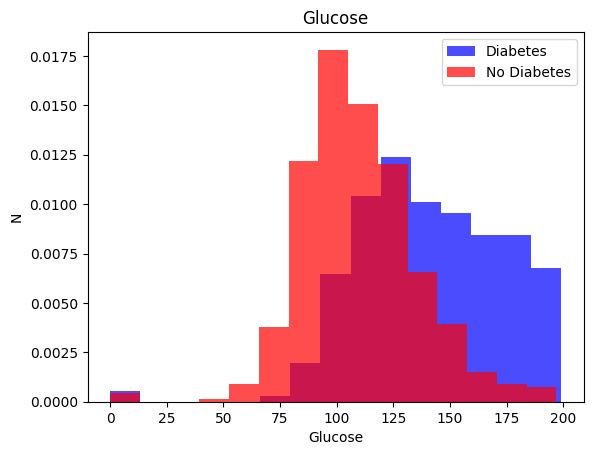

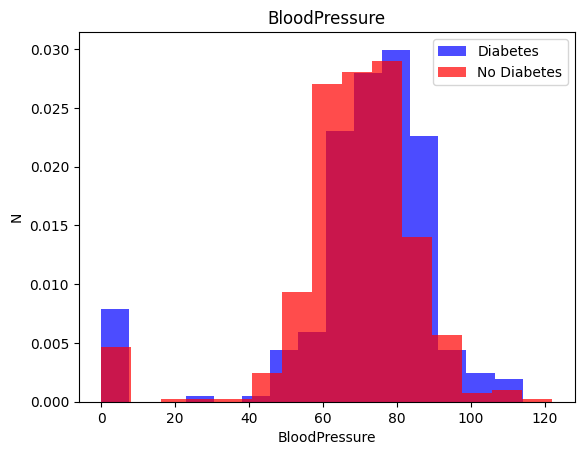

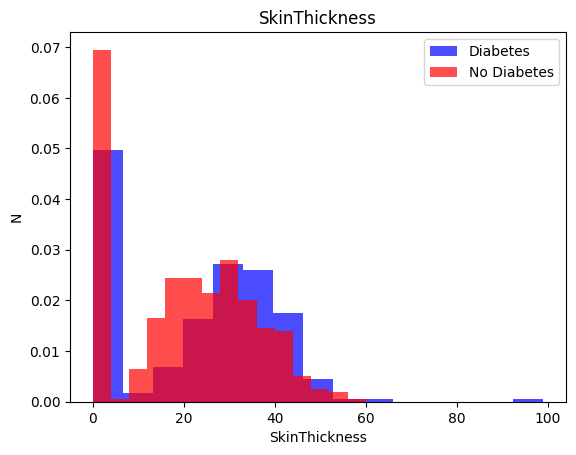

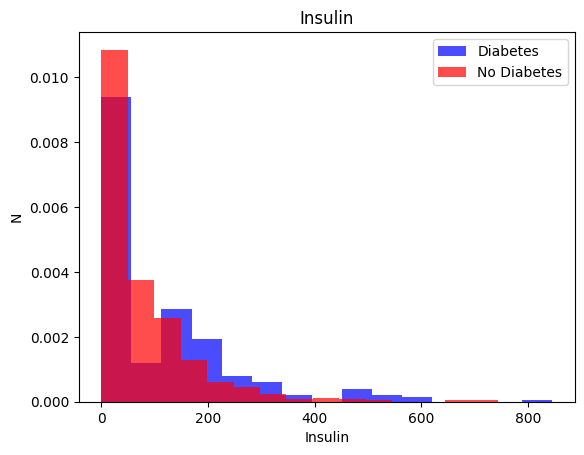

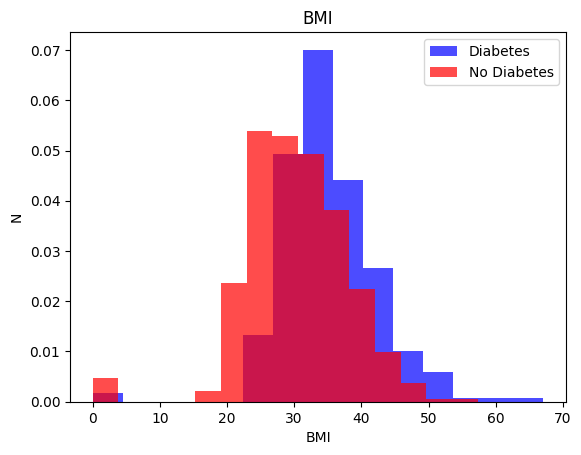

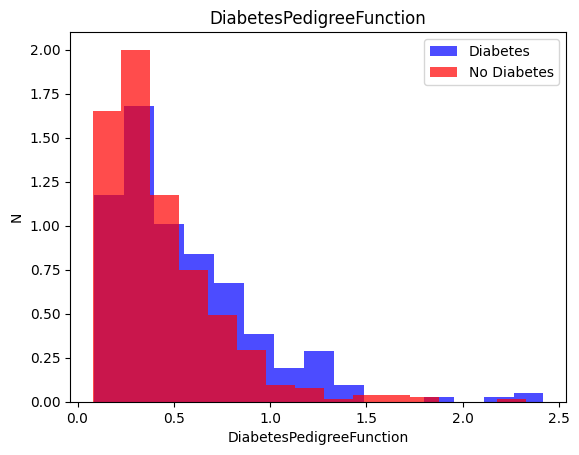

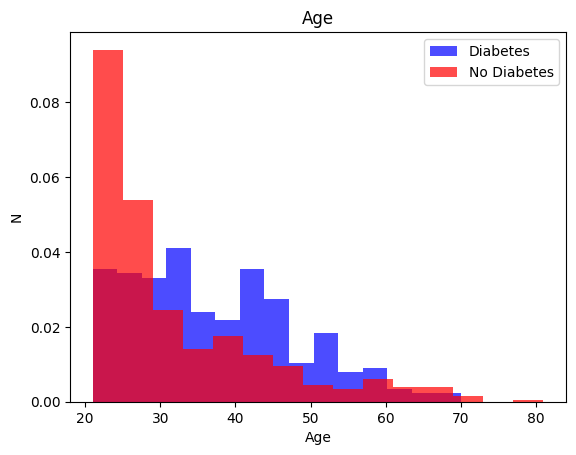

In [7]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability') # Normalizing each column in the data frame by the amount of people in the dataset
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [24]:
#Numpy arrays
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [17]:
# Dataset will first have 40% of input into a training set, of which, 50% of each will be input into testing set
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [18]:
# Create model, and add layers (here we have added 2 'relu' layers which are either a 0 or 1, and 1 sigmoid layer)
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(16, activation='relu'),     # if x<=0 --->y=0, if x>0 ---> y=x
                  tf.keras.layers.Dense(16, activation='relu'),     # if x<=0 --->y=0, if x>0 ---> y=x
                  tf.keras.layers.Dense(1, activation='sigmoid'),   # maps a 0 or 1

])

In [19]:
# Compile model using an optimizer (here we have used Adam), declare a learning rate, add in an accuracy metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [20]:
# Evaluate model using training data
# Inaccurate results since the model has not seen training data before, has not been trained
model.evaluate(x_train, y_train)

15/15 [==============================] - 1s 2ms/step - loss: 7.2300 - accuracy: 0.4500


[7.229984283447266, 0.44999998807907104]

In [21]:
# Evaluate model using validation data
# Again, inaccurate results since the model has not been trained
model.evaluate(x_valid, y_valid)

5/5 [==============================] - 0s 6ms/step - loss: 5.9961 - accuracy: 0.4221


[5.996118545532227, 0.4220779240131378]

In [22]:
# Instruct model to iterate through the training data 20 times
# Note that accuracy improves and loss decreases as model trains more
# However, we could do better
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 1s 6ms/step - loss: 4.2949 - accuracy: 0.4587 - val_loss: 2.0103 - val_accuracy: 0.5260
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 2.1103 - accuracy: 0.4565 - val_loss: 1.5910 - val_accuracy: 0.5909
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 1.5929 - accuracy: 0.5239 - val_loss: 1.1747 - val_accuracy: 0.5390
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: 1.3323 - accuracy: 0.5565 - val_loss: 0.8465 - val_accuracy: 0.6169
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 1.0386 - accuracy: 0.5957 - val_loss: 0.8327 - val_accuracy: 0.6039
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.9371 - accuracy: 0.6348 - val_loss: 0.8398 - val_accuracy: 0.5455
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: 0.9199 - accuracy: 0.6152 - val_loss: 0.7490 - val_accuracy: 0.7143
Epoch 8/20
29/29 [==

In [28]:
# Need to scale data to fit the column values more accurately
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

#As you can see, now the values in the x array are a lot closer in range
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

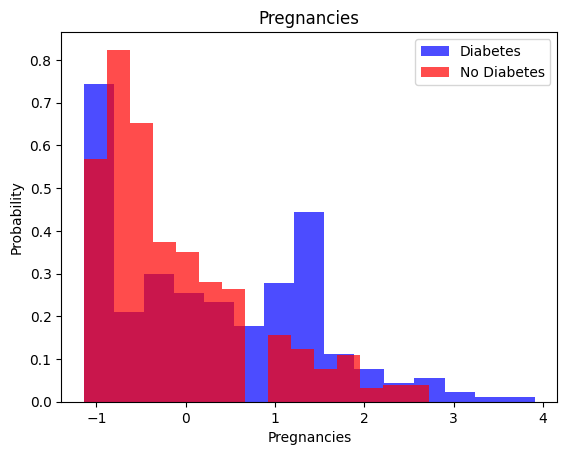

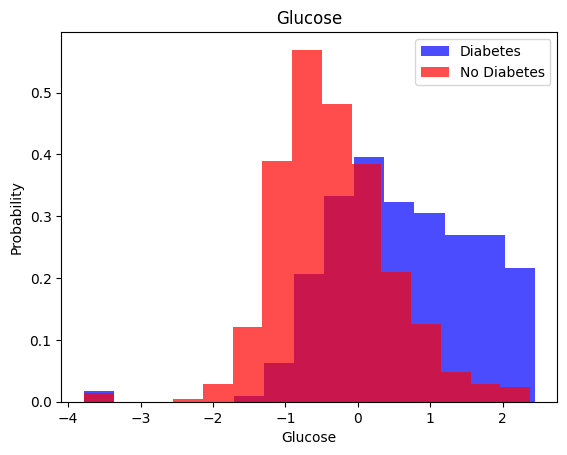

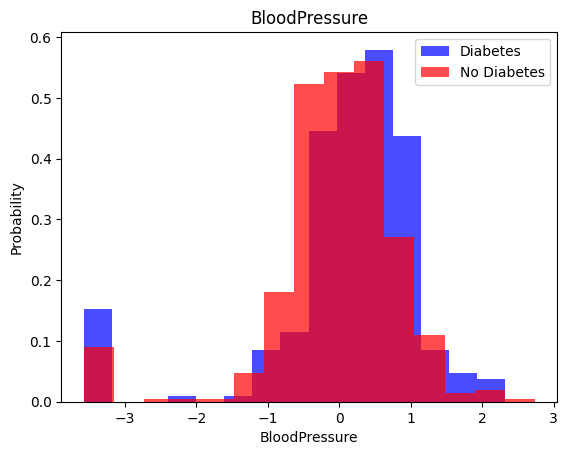

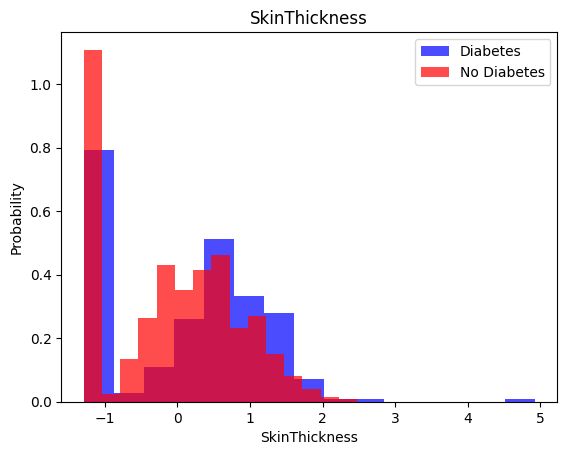

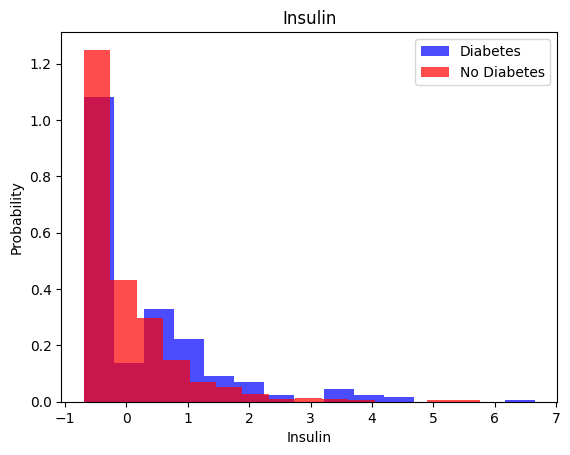

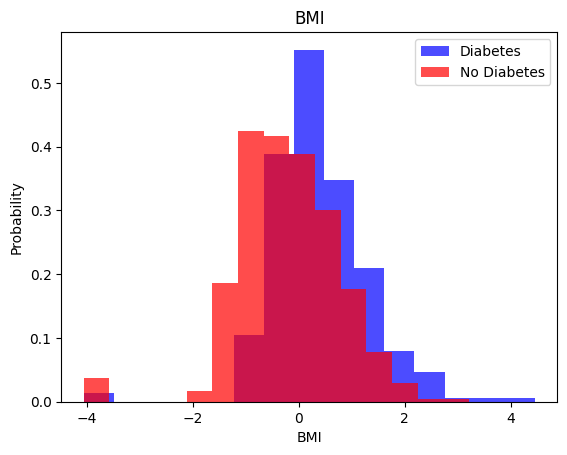

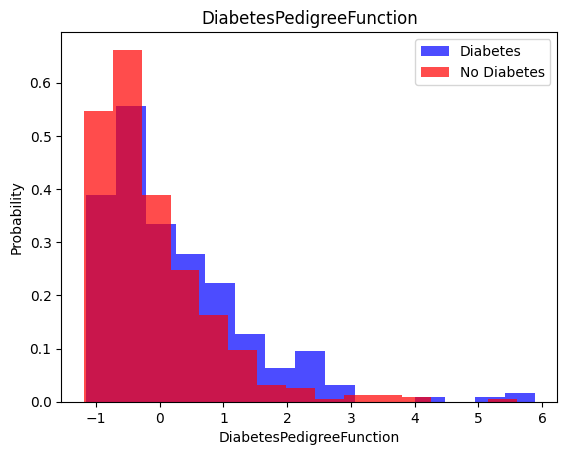

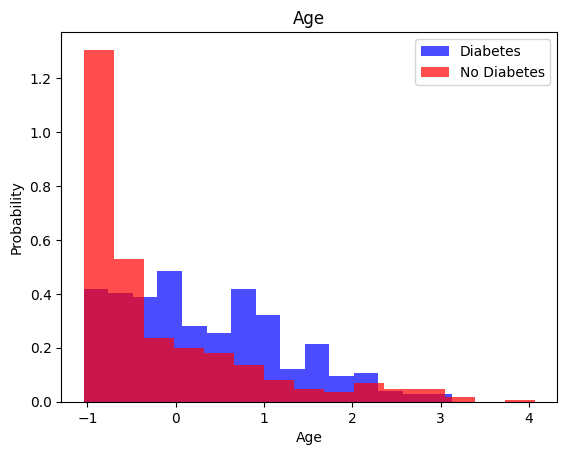

In [31]:
# Plot transformed_df, or our new transformed data frame
# Now, StandardScaler is mapping values to a normal distribution, and is calculating how far our values are from the norm
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability') # Normalizing each column in the data frame by the amount of people in the dataset
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [33]:
# Note that the number of people with diabetes, and the number of people without diabetes is starkly different
# This can also affect how our model trains, so we need to fix this using oversampling, as below
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

In [36]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [37]:
# Now note that the number of people with and without diabetes are equal
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [38]:
# Now rerun model
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

model = tf.keras.Sequential([
                  tf.keras.layers.Dense(16, activation='relu'),     # if x<=0 --->y=0, if x>0 ---> y=x
                  tf.keras.layers.Dense(16, activation='relu'),     # if x<=0 --->y=0, if x>0 ---> y=x
                  tf.keras.layers.Dense(1, activation='sigmoid'),   # maps a 0 or 1

])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [39]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 35.5504 - accuracy: 0.5067


[35.55039596557617, 0.5066666603088379]

In [40]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 38.2276 - accuracy: 0.4650


[38.2276496887207, 0.4650000035762787]

In [41]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 21.9075 - accuracy: 0.4967 - val_loss: 10.4386 - val_accuracy: 0.4300
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 5.1242 - accuracy: 0.4917 - val_loss: 2.3695 - val_accuracy: 0.5150
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 2.0986 - accuracy: 0.4917 - val_loss: 2.0579 - val_accuracy: 0.4650
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 1.7979 - accuracy: 0.4733 - val_loss: 1.7618 - val_accuracy: 0.5000
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 1.5957 - accuracy: 0.4733 - val_loss: 1.7625 - val_accuracy: 0.4550
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 1.4444 - accuracy: 0.4883 - val_loss: 1.5389 - val_accuracy: 0.4950
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 1.3503 - accuracy: 0.4700 - val_loss: 1.4080 - val_accuracy: 0.4800
Epoch 8/20
38/38 [

Note that the accuracy has now increased to 0.6


In [43]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.7754 - accuracy: 0.5800


[0.7754320502281189, 0.5799999833106995]